In [1]:
import pycaret
from pycaret.classification import *
import pandas as pd

In [2]:
data = pd.read_pickle(r'./dataset/test_set_vector.pickle')
def split_vector_to_columns(data):
    col_names = ['feature'+str(i) for i in range(len(data.vector[0]))]
    X = pd.DataFrame(data.vector.tolist(), columns=col_names)
    return pd.concat([X, data.label], axis=1)
d = split_vector_to_columns(data)

In [3]:
s = setup(d, target='label', fold_strategy="kfold", fold=4,)
# s = setup(d, 
#     target='label',
#     remove_outliers=True,
#     outliers_threshold=0.01,
#     normalize=True,
#     normalize_method='zscore',
#     log_experiment=False,
#     train_size=0.8,
#     data_split_shuffle=True,
#     fold_strategy="kfold",
#     fold=5,
#     fold_shuffle=False,
#     feature_selection=True,
#     remove_multicollinearity=False,
#     pca=False,
#     polynomial_features=True,
#     fix_imbalance=True)

,Description,Value
0,Session id,2759
1,Target,label
2,Target type,Binary
3,Original data shape,"(3000, 769)"
4,Transformed data shape,"(3000, 769)"
5,Transformed train set shape,"(2100, 769)"
6,Transformed test set shape,"(900, 769)"
7,Numeric features,768
8,Preprocess,True
9,Imputation type,simple


In [4]:
best = compare_models(cross_validation=True, budget_time=None, sort="F1")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8519,0.0000,0.8565,0.8510,0.8537,0.7034,0.7036,0.3100
lr,Logistic Regression,0.8505,0.9198,0.8527,0.8511,0.8518,0.7007,0.7009,3.1200
lda,Linear Discriminant Analysis,0.8043,0.8741,0.8016,0.8084,0.8049,0.6084,0.6086,1.1225
svm,SVM - Linear Kernel,0.7857,0.0000,0.7591,0.8352,0.7674,0.5721,0.6045,0.3925
lightgbm,Light Gradient Boosting Machine,0.7633,0.8437,0.7742,0.7607,0.7672,0.5266,0.5269,11.1950
gbc,Gradient Boosting Classifier,0.7557,0.8260,0.7736,0.7502,0.7613,0.5115,0.5123,45.0500
ada,Ada Boost Classifier,0.7195,0.7822,0.7319,0.7180,0.7245,0.4389,0.4394,11.8700
rf,Random Forest Classifier,0.7190,0.8008,0.7141,0.7247,0.7191,0.4382,0.4386,4.3800
et,Extra Trees Classifier,0.7100,0.7911,0.6732,0.7302,0.7004,0.4202,0.4216,1.0550
nb,Naive Bayes,0.6710,0.7452,0.6331,0.6877,0.6587,0.3408,0.3423,0.1800


In [5]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [6]:
predict_model(best, verbose=True, probability_threshold=0.5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.8567,0.8564,0.8940,0.8333,0.8626,0.7132,0.7151


,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature760,feature761,feature762,feature763,feature764,feature765,feature766,feature767,label,prediction_label
705,0.107030,0.052410,-0.221044,-0.341321,-0.022965,0.236097,0.126039,-0.050639,-0.132506,-0.540611,...,0.010597,-0.347324,0.434855,0.087684,-0.032038,0.292563,0.616562,0.501767,0,0
1472,0.065267,-0.175395,-0.147179,-0.146671,-0.581547,-0.070761,0.252320,0.129791,0.181538,-0.148195,...,0.101731,-0.210950,0.130808,-0.200007,0.045971,-0.203144,0.327627,0.414528,0,1
758,-0.228549,-0.246172,-0.016074,-0.244683,-0.529837,0.054099,0.175097,0.082500,-0.067606,-0.145215,...,0.326547,0.002984,0.323770,-0.456793,0.086599,0.061776,0.704207,0.670294,1,1
2052,-0.399893,0.047872,-0.216384,-0.349631,-0.183132,-0.066160,0.198221,0.377503,-0.015268,-0.352026,...,0.075090,-0.169558,0.316181,-0.146436,-0.225084,0.360430,0.444605,0.407156,0,0
2720,-0.400371,-0.121687,-0.339393,-0.414055,-0.483541,0.214072,0.439470,0.304091,-0.297049,-0.162220,...,0.256843,-0.006688,0.063720,-0.196757,-0.028086,-0.051747,0.536457,0.706151,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1355,-0.107951,-0.012612,-0.119925,-0.369641,-0.077783,0.105134,-0.141668,0.101164,0.090848,-0.159113,...,-0.038084,-0.321400,0.153000,0.169315,-0.218710,0.251299,0.662726,0.251579,1,1
39,-0.038367,-0.212747,0.117565,0.045470,-0.336857,-0.261521,0.075826,0.046625,0.113886,-0.087062,...,0.077818,-0.009823,0.390911,-0.123231,0.107143,0.062002,0.465106,0.284196,1,1
599,-0.198900,-0.279006,-0.004101,-0.125753,-0.257936,-0.287308,0.084475,-0.007619,0.362651,-0.016315,...,-0.053622,-0.284472,0.209302,-0.120552,-0.004641,0.234543,0.550788,0.386614,1,1
1664,-0.451327,-0.293096,0.302689,-0.050292,-0.161002,0.013172,-0.012959,0.303078,-0.016535,-0.107991,...,0.139414,-0.133145,0.266855,0.043711,-0.142355,0.100085,0.435261,0.746265,1,1


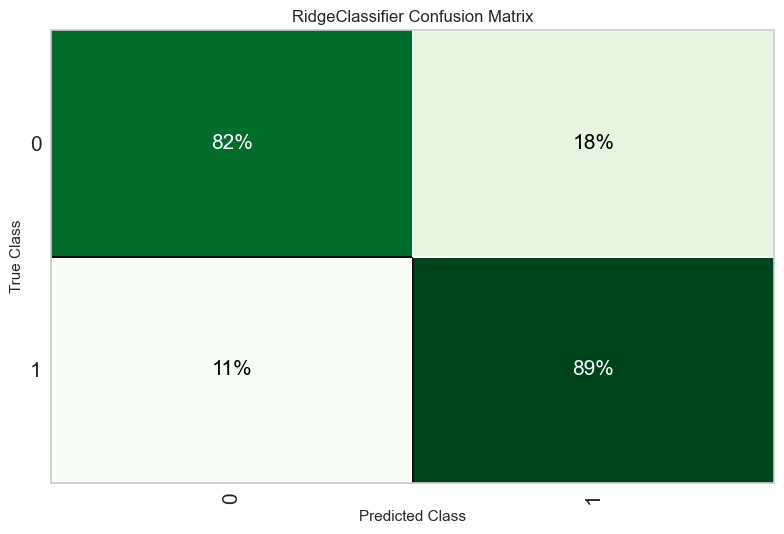

In [7]:
plot_model(best, plot="confusion_matrix", save=False, plot_kwargs={"percent": True})

In [8]:
#plot_model(best, plot="auc")

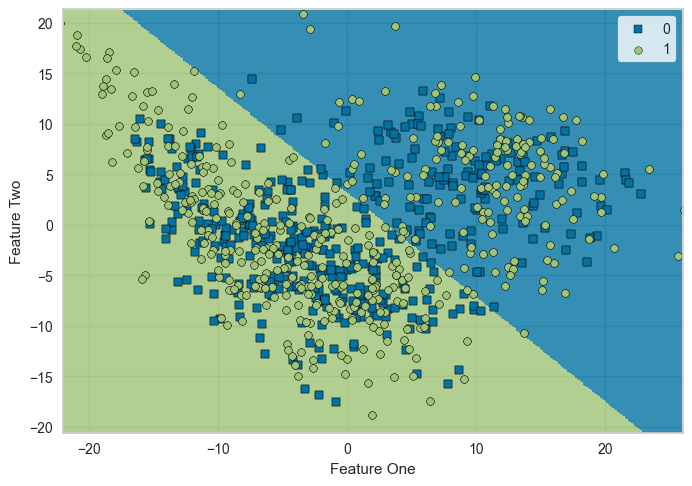

In [9]:
plot_model(best, plot="boundary")

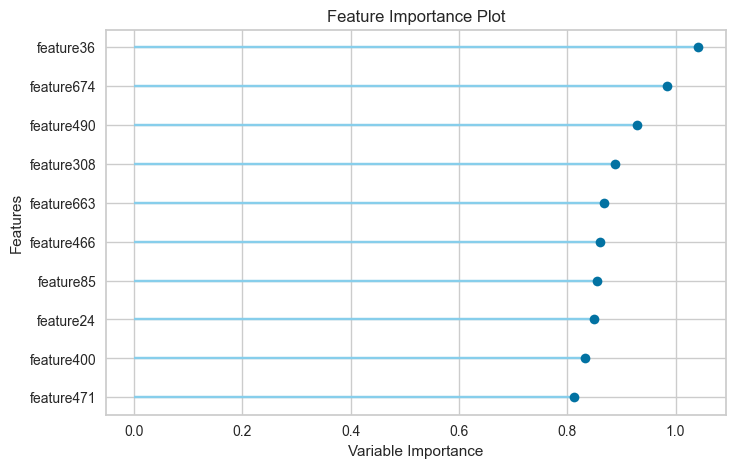

In [10]:
plot_model(best, plot="feature")